# 1. Buisiness understanding

## Importing Libraries

In [1]:
import pandas as pd     #Data preprocessiong operations
import inspect
import numpy as np     #Linear algebra operations
import csv     #CSV file operations
import matplotlib.pyplot as plt     #Visualizations
import seaborn as sns     #Visualizations

##  Importing Dataset

#### This is the dataset Kaggle link: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

In [2]:
training_dataset = pd.read_csv("training_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")

# 2. Data Overview

In [3]:
training_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
test_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [5]:
def overView(df):
    '''
    Overview of the dataset
    
    df_name :     Dataframe name
    '''
    # get the name of the dataset
    frame = inspect.currentframe().f_back
    df_name = [name for name, val in frame.f_locals.items() if val is df][0]
    print(f"{df_name}")
    print(f"\nShape: {df.shape}")
    print(f"\nFeatures:")
    print(f"\n{df.columns.tolist()}")
    print(f"\nMissing values: {df.isna().sum().sum()}")
    print(f"\nUnique values:")
    print(f"\n{df.nunique()}")

In [6]:
overView(training_dataset)

training_dataset

Shape: (2666, 20)

Features:

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            2

In [7]:
overView(test_dataset)

test_dataset

Shape: (667, 20)

Features:

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:

State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl charge   

# 3. Data Exploration

## 3.1. Customer Churn

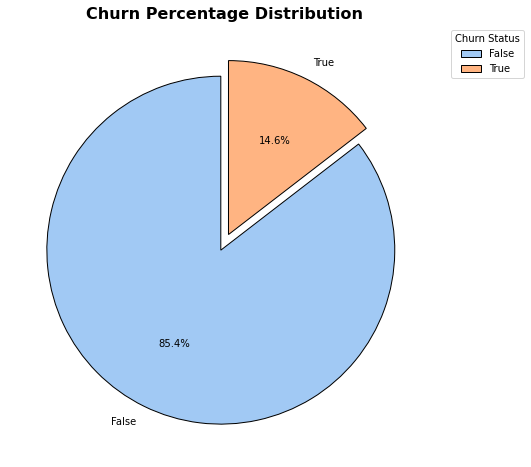

In [8]:
churn_counts = training_dataset['Churn'].value_counts(normalize=True) * 100

# Define colors and explode effect for each slice
colors = sns.color_palette('pastel')  
explode = [0.05] * len(churn_counts)  

# Create pie chart with enhancements
plt.figure(figsize=(10, 8))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title('Churn Percentage Distribution', fontsize=16, fontweight='bold')
plt.legend(title="Churn Status", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()